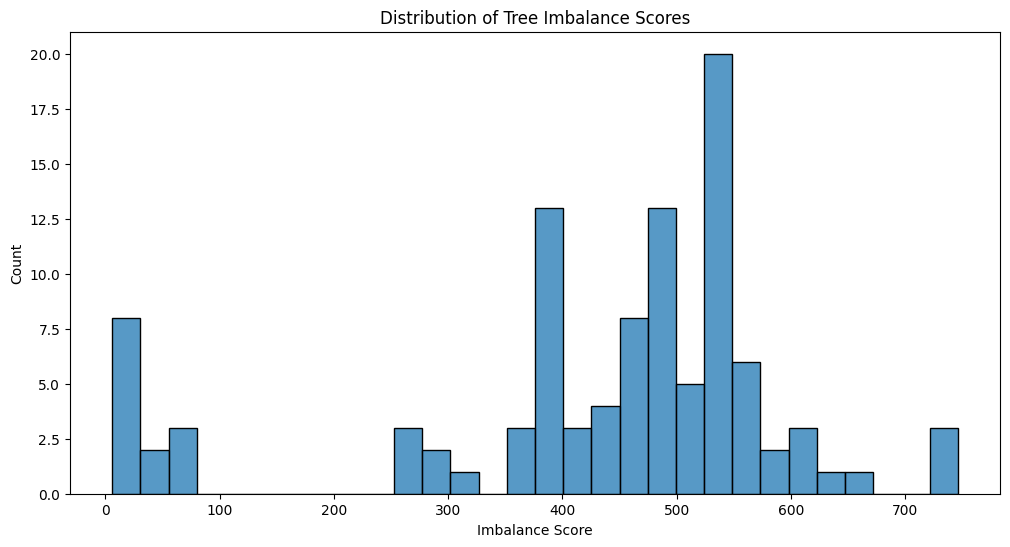

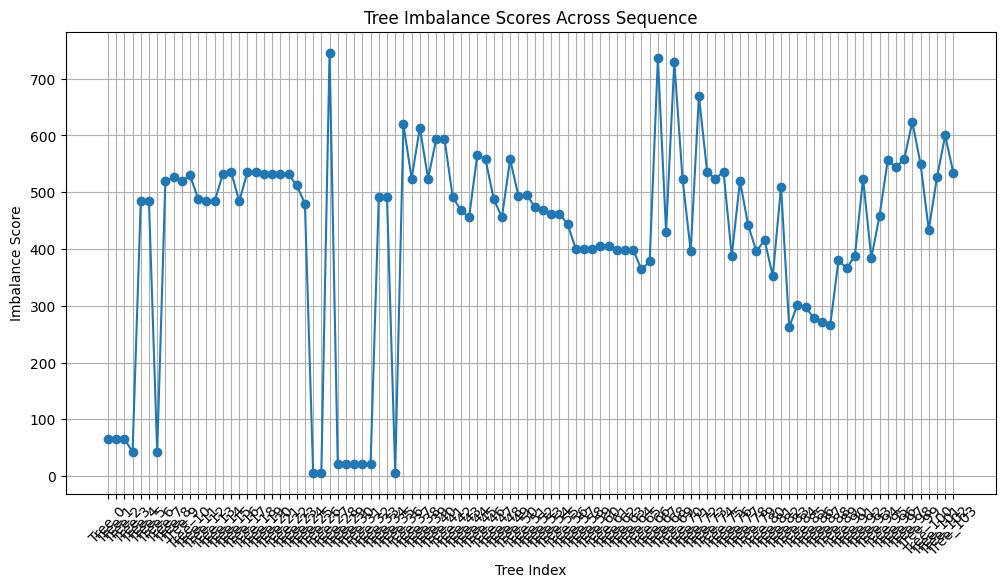


Imbalance Score Statistics:
        Imbalance
count  104.000000
mean   426.673077
std    175.305251
min      6.000000
25%    388.000000
50%    484.000000
75%    532.000000
max    746.000000

Trees with Extreme Imbalance:
Empty DataFrame
Columns: [Imbalance]
Index: []


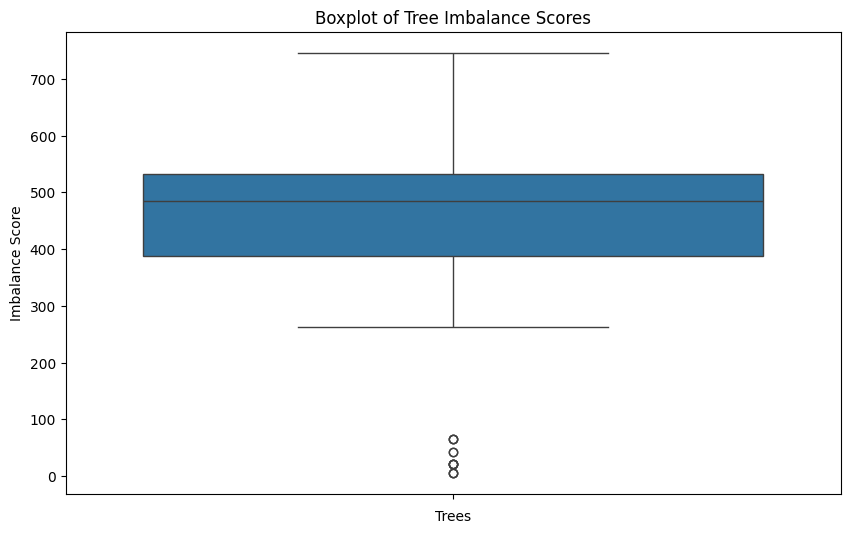

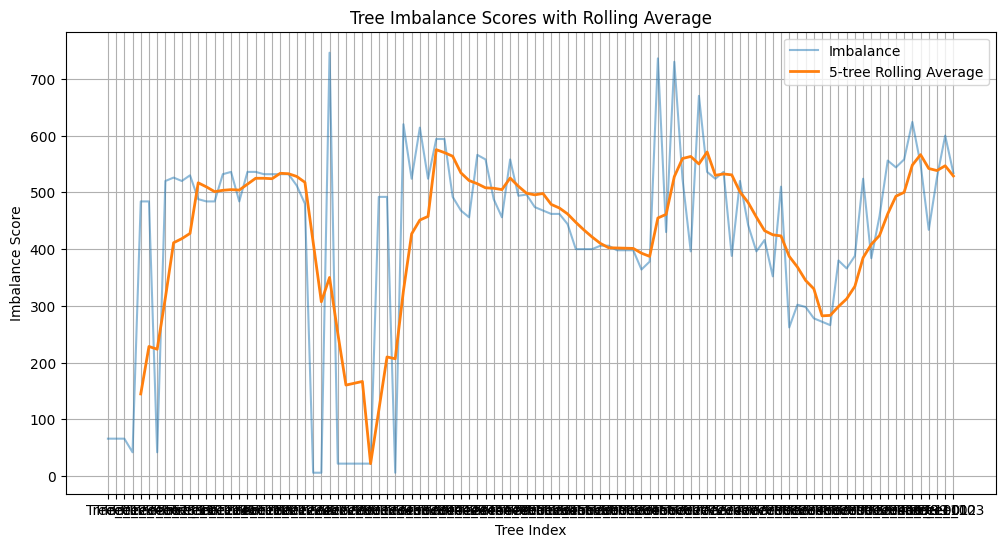


Autocorrelation (lag=1): 0.426


<Figure size 1000x600 with 0 Axes>

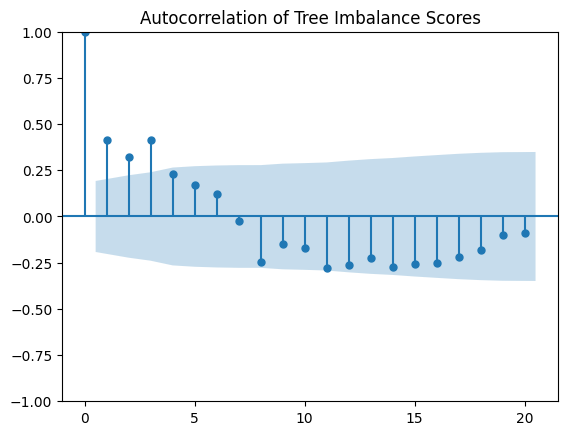

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Clustering Analysis using Hierarchical Clustering
from statsmodels.graphics.tsaplots import plot_acf
from brancharchitect.io import read_newick
from brancharchitect.tree_imbalance import compute_tree_imbalance
# ===========================
# Reading Trees and Computing Imbalance
# ===========================

# Read trees from a Newick file
trees = read_newick(
     "./../../sliding-window/output_norovirus_window_size_200_5/best_trees.newick"
)

# Compute imbalance scores for all trees
imbalance_scores = compute_tree_imbalance(trees)

# Convert to DataFrame for easier analysis
imbalance_df = pd.DataFrame.from_dict(imbalance_scores, orient='index', columns=['Imbalance'])
imbalance_df.index.name = 'Tree'

# ===========================
# Visualization and Analysis
# ===========================

# Plot imbalance distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=imbalance_df, x='Imbalance', bins=30)
plt.title('Distribution of Tree Imbalance Scores')
plt.xlabel('Imbalance Score')
plt.ylabel('Count')
plt.show()

# Plot imbalance over tree sequence
plt.figure(figsize=(12, 6))
plt.plot(imbalance_df.index, imbalance_df['Imbalance'], marker='o')
plt.title('Tree Imbalance Scores Across Sequence')
plt.xlabel('Tree Index')
plt.ylabel('Imbalance Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ===========================
# Statistical Analysis
# ===========================

# Compute basic statistics
imbalance_stats = imbalance_df.describe()
print("\nImbalance Score Statistics:")
print(imbalance_stats)

# Identify trees with extreme imbalance
threshold = imbalance_df['Imbalance'].mean() + 2 * imbalance_df['Imbalance'].std()
outliers = imbalance_df[imbalance_df['Imbalance'] > threshold]
print("\nTrees with Extreme Imbalance:")
print(outliers)

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=imbalance_df['Imbalance'])
plt.title('Boxplot of Tree Imbalance Scores')
plt.xlabel('Trees')
plt.ylabel('Imbalance Score')
plt.show()

# ===========================
# Time Series Analysis
# ===========================

# Calculate rolling average
window_size = 5
rolling_mean = imbalance_df['Imbalance'].rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(imbalance_df.index, imbalance_df['Imbalance'], label='Imbalance', alpha=0.5)
plt.plot(imbalance_df.index, rolling_mean, label=f'{window_size}-tree Rolling Average', linewidth=2)
plt.title('Tree Imbalance Scores with Rolling Average')
plt.xlabel('Tree Index')
plt.ylabel('Imbalance Score')
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# Correlation Analysis
# ===========================

# Compute autocorrelation
autocorr = pd.Series(imbalance_df['Imbalance'].autocorr(lag=1))
print(f"\nAutocorrelation (lag=1): {autocorr[0]:.3f}")

# Plot autocorrelation

plt.figure(figsize=(10, 6))
plot_acf(imbalance_df['Imbalance'], lags=20)
plt.title('Autocorrelation of Tree Imbalance Scores')
plt.show()

# Save results to CSV
imbalance_df.to_csv('tree_imbalance_analysis.csv')